In [75]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import mean_squared_error
import tensorflow as tf

sns.set_style('whitegrid')

In [3]:
df = pd.read_csv('all_bovespa.csv', sep=',')
df

,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_max,preco_minimo,preco_fechamento,qtd_negocios,volume_negocios,preco_maximo
0,2017-01-02,AALR3,ALLIAR,14.62,1488.0,14.40,14.60,35900.0,5.235050e+07,14.88
1,2017-01-02,ABCB4,ABC BRASIL,13.40,1352.0,13.08,13.31,195800.0,2.605570e+08,13.52
2,2017-01-02,ABEV3,AMBEV S/A,16.34,1666.0,16.26,16.31,4265400.0,7.004007e+09,16.66
3,2017-01-02,ADHM3,ADVANCED-DH,0.81,83.0,0.76,0.79,68600.0,5.407500e+06,0.83
4,2017-01-02,AFLT3,AFLUENTE T,3.18,318.0,3.18,3.18,100.0,3.180000e+04,3.18
...,...,...,...,...,...,...,...,...,...,...
539843,2021-10-22,YDUQ3,YDUQS PART,23.59,2372.0,21.44,22.65,6167100.0,1.389626e+10,23.72
539844,2021-10-22,Z1OM34,ZOOM VIDEO,64.23,6520.0,62.85,62.85,3584.0,2.284872e+07,65.20
539845,2021-10-22,Z1TO34,ZTO EXPRESS,45.13,4513.0,44.10,44.10,32.0,1.421500e+05,45.13
539846,2021-10-22,Z1TS34,ZOETIS INC,295.80,29700.0,295.80,297.00,400.0,1.185600e+07,297.00


In [183]:
df[df['sigla_acao'] == 'BBAS3']

,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_max,preco_minimo,preco_fechamento,qtd_negocios,volume_negocios,preco_maximo
16,2017-01-02,BBAS3,BRASIL,27.90,2796.0,27.44,27.54,1968200.0,5.447066e+09,27.96
285,2017-01-03,BBAS3,BRASIL,27.76,2880.0,27.76,28.80,7578900.0,2.161498e+10,28.80
611,2017-01-04,BBAS3,BRASIL,28.65,2900.0,28.55,28.65,4156300.0,1.196699e+10,29.00
931,2017-01-05,BBAS3,BRASIL,28.72,2890.0,28.43,28.58,5457100.0,1.564667e+10,28.90
1239,2017-01-06,BBAS3,BRASIL,28.58,2893.0,28.54,28.89,3692400.0,1.063311e+10,28.93
...,...,...,...,...,...,...,...,...,...,...
535655,2021-10-18,BBAS3,BRASIL,31.25,3237.0,31.14,32.21,14981900.0,4.783789e+10,32.37
536493,2021-10-19,BBAS3,BRASIL,31.87,3187.0,30.54,30.63,22873400.0,7.105960e+10,31.87
537382,2021-10-20,BBAS3,BRASIL,31.00,3154.0,30.55,31.14,12900500.0,4.012477e+10,31.54
538218,2021-10-21,BBAS3,BRASIL,30.50,3096.0,29.35,29.82,25709200.0,7.722822e+10,30.96


In [4]:
df['data_pregao'] = pd.to_datetime(df['data_pregao'], format='%Y-%m-%d')

In [5]:
df['data_pregao'][0]

Timestamp('2017-01-02 00:00:00')

In [6]:
df_acao = df[df['sigla_acao'] == 'PETR4']
df_acao

,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_max,preco_minimo,preco_fechamento,qtd_negocios,volume_negocios,preco_maximo
180,2017-01-02,PETR4,PETROBRAS,14.64,1470.0,14.60,14.66,7525700.0,1.102516e+10,14.70
489,2017-01-03,PETR4,PETROBRAS,14.95,1565.0,14.95,15.50,39947800.0,6.137265e+10,15.65
811,2017-01-04,PETR4,PETROBRAS,15.45,1568.0,15.31,15.50,37071700.0,5.746605e+10,15.68
1122,2017-01-05,PETR4,PETROBRAS,15.70,1591.0,15.62,15.75,47586300.0,7.504160e+10,15.91
1416,2017-01-06,PETR4,PETROBRAS,15.78,1592.0,15.50,15.66,25592000.0,4.013833e+10,15.92
...,...,...,...,...,...,...,...,...,...,...
536164,2021-10-18,PETR4,PETROBRAS,29.40,2964.0,28.99,29.45,68971300.0,2.026602e+11,29.64
537047,2021-10-19,PETR4,PETROBRAS,29.24,2932.0,27.86,28.01,111484000.0,3.168281e+11,29.32
537887,2021-10-20,PETR4,PETROBRAS,28.27,2880.0,27.95,28.41,56063300.0,1.593120e+11,28.80
538742,2021-10-21,PETR4,PETROBRAS,27.86,2818.0,26.92,27.45,101567700.0,2.788336e+11,28.18


In [7]:
df_acao_fec = df_acao[['data_pregao','preco_fechamento']]
df_acao_fec

,data_pregao,preco_fechamento
180,2017-01-02,14.66
489,2017-01-03,15.50
811,2017-01-04,15.50
1122,2017-01-05,15.75
1416,2017-01-06,15.66
...,...,...
536164,2021-10-18,29.45
537047,2021-10-19,28.01
537887,2021-10-20,28.41
538742,2021-10-21,27.45


In [8]:
df_acao_fec = df_acao_fec.set_index('data_pregao')

In [9]:
df_acao_fec

,preco_fechamento
data_pregao,
2017-01-02,14.66
2017-01-03,15.50
2017-01-04,15.50
2017-01-05,15.75
2017-01-06,15.66
...,...
2021-10-18,29.45
2021-10-19,28.01
2021-10-20,28.41


Text(0.5, 0, 'Data')

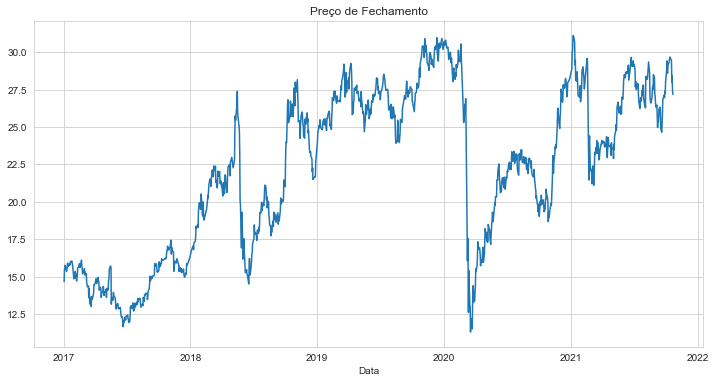

In [10]:
plt.figure(figsize=(12,6))
plt.title('Preço de Fechamento')
plt.plot(df_acao_fec['preco_fechamento'])
plt.xlabel('Data')

In [11]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_acao_fec)

In [12]:
number = int(0.7* len(df_scaled))
train = df_scaled[:number]

In [13]:
test = df_scaled[number:]

In [14]:
print(len(train), len(test))

832 357


In [15]:
def create_df(df,steps=1):
    dataX, dataY = [],[]
    for i in range(len(df) - steps - 1):
        a = df[i:(i+steps),0]
        dataX.append(a)
        dataY.append(df[i+ steps,0])
        
    return np.array(dataX), np.array(dataY)

In [16]:
steps = 15
X_train, y_train = create_df(train, steps)
X_test, y_test = create_df(test, steps)

In [17]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(816, 15)
(816,)
(341, 15)
(341,)


In [18]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [306]:
# tf.random.set_seed(30)

model = Sequential([
    
    LSTM(35, return_sequences=True, input_shape=(steps,1)),
    LSTM(35, return_sequences=True),
    LSTM(35),
    Dropout(0.2),
    
    Dense(1, activation='linear')
    
])

model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_61 (LSTM)               (None, 15, 35)            5180      
_________________________________________________________________
lstm_62 (LSTM)               (None, 15, 35)            9940      
_________________________________________________________________
lstm_63 (LSTM)               (None, 35)                9940      
_________________________________________________________________
dropout_20 (Dropout)         (None, 35)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 36        
Total params: 25,096
Trainable params: 25,096
Non-trainable params: 0
_________________________________________________________________


In [307]:
history = model.fit(X_train, y_train, epochs=200, batch_size=15, validation_data=(X_test,y_test))

Epoch 1/200
55/55 [==============================] - 5s 27ms/step - loss: 0.0411 - mae: 0.1367 - val_loss: 0.0110 - val_mae: 0.0869
Epoch 2/200
55/55 [==============================] - 1s 13ms/step - loss: 0.0129 - mae: 0.0788 - val_loss: 0.0061 - val_mae: 0.0587
Epoch 3/200
55/55 [==============================] - 1s 14ms/step - loss: 0.0116 - mae: 0.0735 - val_loss: 0.0058 - val_mae: 0.0576
Epoch 4/200
55/55 [==============================] - 1s 13ms/step - loss: 0.0112 - mae: 0.0729 - val_loss: 0.0054 - val_mae: 0.0539
Epoch 5/200
55/55 [==============================] - 1s 14ms/step - loss: 0.0113 - mae: 0.0726 - val_loss: 0.0056 - val_mae: 0.0574
Epoch 6/200
55/55 [==============================] - 1s 13ms/step - loss: 0.0099 - mae: 0.0679 - val_loss: 0.0056 - val_mae: 0.0584
Epoch 7/200
55/55 [==============================] - 1s 13ms/step - loss: 0.0093 - mae: 0.0658 - val_loss: 0.0042 - val_mae: 0.0490
Epoch 8/200
55/55 [==============================] - 1s 13ms/step - loss: 0.

55/55 [==============================] - 1s 13ms/step - loss: 0.0022 - mae: 0.0342 - val_loss: 0.0014 - val_mae: 0.0268
Epoch 63/200
55/55 [==============================] - 1s 13ms/step - loss: 0.0024 - mae: 0.0345 - val_loss: 0.0020 - val_mae: 0.0353
Epoch 64/200
55/55 [==============================] - 1s 13ms/step - loss: 0.0024 - mae: 0.0341 - val_loss: 0.0013 - val_mae: 0.0250
Epoch 65/200
55/55 [==============================] - ETA: 0s - loss: 0.0025 - mae: 0.036 - 1s 13ms/step - loss: 0.0025 - mae: 0.0358 - val_loss: 0.0024 - val_mae: 0.0394
Epoch 66/200
55/55 [==============================] - 1s 13ms/step - loss: 0.0024 - mae: 0.0357 - val_loss: 0.0026 - val_mae: 0.0412
Epoch 67/200
55/55 [==============================] - 1s 13ms/step - loss: 0.0028 - mae: 0.0366 - val_loss: 0.0013 - val_mae: 0.0258
Epoch 68/200
55/55 [==============================] - 1s 13ms/step - loss: 0.0022 - mae: 0.0325 - val_loss: 0.0013 - val_mae: 0.0262
Epoch 69/200
55/55 [========================

Epoch 123/200
55/55 [==============================] - 1s 13ms/step - loss: 0.0020 - mae: 0.0325 - val_loss: 0.0012 - val_mae: 0.0243
Epoch 124/200
55/55 [==============================] - 1s 13ms/step - loss: 0.0018 - mae: 0.0312 - val_loss: 0.0012 - val_mae: 0.0246
Epoch 125/200
55/55 [==============================] - 1s 13ms/step - loss: 0.0019 - mae: 0.0325 - val_loss: 0.0016 - val_mae: 0.0309
Epoch 126/200
55/55 [==============================] - 1s 13ms/step - loss: 0.0019 - mae: 0.0321 - val_loss: 0.0012 - val_mae: 0.0256
Epoch 127/200
55/55 [==============================] - 1s 13ms/step - loss: 0.0018 - mae: 0.0312 - val_loss: 0.0015 - val_mae: 0.0278
Epoch 128/200
55/55 [==============================] - 1s 13ms/step - loss: 0.0019 - mae: 0.0322 - val_loss: 0.0011 - val_mae: 0.0237
Epoch 129/200
55/55 [==============================] - 1s 13ms/step - loss: 0.0018 - mae: 0.0306 - val_loss: 0.0012 - val_mae: 0.0246
Epoch 130/200
55/55 [==============================] - 1s 13ms

55/55 [==============================] - 1s 13ms/step - loss: 0.0016 - mae: 0.0302 - val_loss: 0.0015 - val_mae: 0.0288
Epoch 185/200
55/55 [==============================] - 1s 13ms/step - loss: 0.0019 - mae: 0.0323 - val_loss: 0.0012 - val_mae: 0.0245
Epoch 186/200
55/55 [==============================] - 1s 13ms/step - loss: 0.0017 - mae: 0.0303 - val_loss: 0.0014 - val_mae: 0.0274
Epoch 187/200
55/55 [==============================] - 1s 13ms/step - loss: 0.0018 - mae: 0.0316 - val_loss: 0.0012 - val_mae: 0.0245
Epoch 188/200
55/55 [==============================] - 1s 13ms/step - loss: 0.0016 - mae: 0.0296 - val_loss: 0.0011 - val_mae: 0.0244
Epoch 189/200
55/55 [==============================] - 1s 13ms/step - loss: 0.0017 - mae: 0.0306 - val_loss: 0.0012 - val_mae: 0.0246
Epoch 190/200
55/55 [==============================] - 1s 13ms/step - loss: 0.0017 - mae: 0.0299 - val_loss: 0.0015 - val_mae: 0.0286
Epoch 191/200
55/55 [==============================] - 1s 13ms/step - loss: 

Text(0.5, 0, 'Epochs')

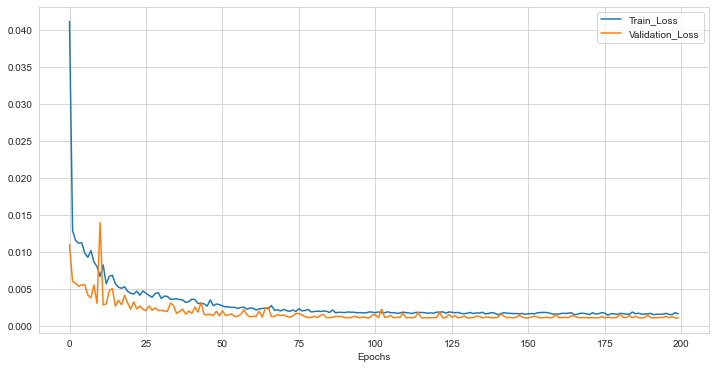

In [308]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='Train_Loss')
plt.plot(history.history['val_loss'], label='Validation_Loss')
plt.legend(loc='best')
plt.xlabel('Epochs')

In [309]:
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)

In [310]:
y_true = scaler.inverse_transform(y_test)

Text(0.5, 0, 'Data')

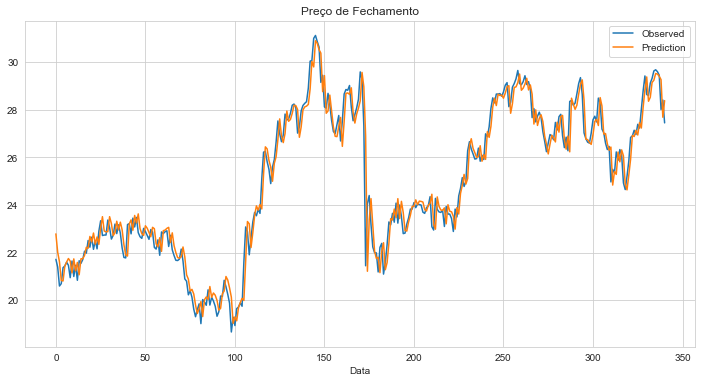

In [311]:
plt.figure(figsize=(12,6))
plt.title('Preço de Fechamento')
plt.plot(y_true, label='Observed')
plt.plot(y_pred, label='Prediction')
plt.legend(loc='best')
plt.xlabel('Data')

In [312]:
mse = np.mean((y_true - y_pred)**2)
mae = np.mean(abs(y_true - y_pred))

print(f'MSE: {mse}')
print(f'MAE: {mae}')

MSE: 0.44932200421240925
MAE: 0.48278376470213413


In [313]:
lenght_test = len(test)
lenght_test

357

In [314]:
days_input_steps = lenght_test - steps
days_input_steps

342

In [315]:
input_steps = test[days_input_steps:]
input_steps = np.array(input_steps).reshape(1,-1)
input_steps

array([[0.84266263, 0.88250126, 0.91427131, 0.87493696, 0.87291982,
        0.89914271, 0.90922844, 0.92486132, 0.92738275, 0.92334846,
        0.91578417, 0.84316692, 0.86333838, 0.81492688, 0.80131114]])

In [316]:
list_output_steps = list(input_steps)
list_output_steps = list_output_steps[0].tolist()
list_output_steps

[0.842662632375189,
 0.8825012607160866,
 0.9142713061018658,
 0.8749369641956631,
 0.8729198184568835,
 0.8991427130610187,
 0.9092284417549167,
 0.9248613212304587,
 0.9273827534039333,
 0.9233484619263742,
 0.9157841654059505,
 0.8431669188098839,
 0.8633383761976802,
 0.8149268784669691,
 0.8013111447302067]

In [317]:
pred_output = []
i = 0
n_future = 10

while(i < n_future):
    
    if len(list_output_steps) > steps:
        
        input_steps = np.array(list_output_steps[1:])
        print(f'\n{i} dia. Valores de entrada -> {input_steps}')
        input_steps = input_steps.reshape(1,-1)
        input_steps = input_steps.reshape((1,steps,1))
        pred = model.predict(input_steps, verbose=0)
        print(f'\n{i} dia. Valor previsto -> {pred}')
        list_output_steps.extend(pred[0].tolist())
        list_output_steps = list_output_steps[1:]
        pred_output.extend(pred.tolist())
        i+=1
        
    else:
        input_steps = input_steps.reshape((1,steps,1))
        pred = model.predict(input_steps, verbose=0)
        print(pred[0])
        list_output_steps.extend(pred[0].tolist())
        print(len(list_output_steps))
        pred_output.extend(pred.tolist())
        i+=1
        
print(pred_output)        

[0.7949111]
16

1 dia. Valores de entrada -> [0.88250126 0.91427131 0.87493696 0.87291982 0.89914271 0.90922844
 0.92486132 0.92738275 0.92334846 0.91578417 0.84316692 0.86333838
 0.81492688 0.80131114 0.79491109]

1 dia. Valor previsto -> [[0.7890482]]

2 dia. Valores de entrada -> [0.91427131 0.87493696 0.87291982 0.89914271 0.90922844 0.92486132
 0.92738275 0.92334846 0.91578417 0.84316692 0.86333838 0.81492688
 0.80131114 0.79491109 0.78904819]

2 dia. Valor previsto -> [[0.7827937]]

3 dia. Valores de entrada -> [0.87493696 0.87291982 0.89914271 0.90922844 0.92486132 0.92738275
 0.92334846 0.91578417 0.84316692 0.86333838 0.81492688 0.80131114
 0.79491109 0.78904819 0.7827937 ]

3 dia. Valor previsto -> [[0.7760329]]

4 dia. Valores de entrada -> [0.87291982 0.89914271 0.90922844 0.92486132 0.92738275 0.92334846
 0.91578417 0.84316692 0.86333838 0.81492688 0.80131114 0.79491109
 0.78904819 0.7827937  0.77603292]

4 dia. Valor previsto -> [[0.76955736]]

5 dia. Valores de entrada -

In [318]:
prev = scaler.inverse_transform(pred_output)
prev = np.array(prev).reshape(1,-1)
list_output_prev = list(prev)
list_output_prev = prev[0].tolist()
list_output_prev

[27.053086846470833,
 26.936825704574584,
 26.8127990847826,
 26.678732895851134,
 26.55032238602638,
 26.43970155775547,
 26.351133741140366,
 26.283263227939607,
 26.23207489967346,
 26.193358614444733]

In [319]:
dates = pd.to_datetime(df_acao['data_pregao'])
predict_dates = pd.date_range(list(dates)[-2] + pd.DateOffset(1), periods=10, freq='b').tolist()
predict_dates

[Timestamp('2021-10-22 00:00:00', freq='B'),
 Timestamp('2021-10-25 00:00:00', freq='B'),
 Timestamp('2021-10-26 00:00:00', freq='B'),
 Timestamp('2021-10-27 00:00:00', freq='B'),
 Timestamp('2021-10-28 00:00:00', freq='B'),
 Timestamp('2021-10-29 00:00:00', freq='B'),
 Timestamp('2021-11-01 00:00:00', freq='B'),
 Timestamp('2021-11-02 00:00:00', freq='B'),
 Timestamp('2021-11-03 00:00:00', freq='B'),
 Timestamp('2021-11-04 00:00:00', freq='B')]

In [320]:
forecast_dates = []

for i in predict_dates:
    forecast_dates.append(i.date())
    
df_forecast = pd.DataFrame({'data_pregao': np.array(forecast_dates) , 'preco_fechamento': list_output_prev})
df_forecast['data_pregao'] = pd.to_datetime(df_forecast['data_pregao'])

df_forecast = df_forecast.set_index('data_pregao')
df_forecast

,preco_fechamento
data_pregao,
2021-10-22,27.053087
2021-10-25,26.936826
2021-10-26,26.812799
2021-10-27,26.678733
2021-10-28,26.550322
2021-10-29,26.439702
2021-11-01,26.351134
2021-11-02,26.283263
2021-11-03,26.232075


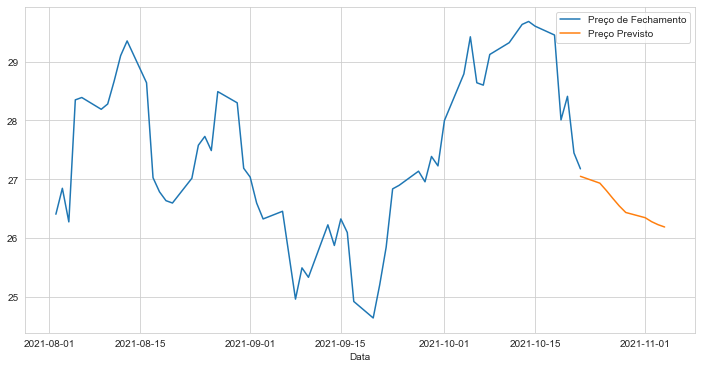

In [321]:
plt.figure(figsize=(12,6))
plt.plot(df_acao_fec['preco_fechamento']['2021-08-01':], label='Preço de Fechamento')
plt.plot(df_forecast['preco_fechamento'], label='Preço Previsto')
plt.legend(loc='best')
plt.xlabel('Data')
plt.show()